In [1]:
%pylab inline
#import mentari_v2 as mtr
import h5py
import os

Populating the interactive namespace from numpy and matplotlib


/apps/skylake/software/mpi/gcc/6.4.0/openmpi/3.0.0/h5py/2.7.1-python-3.6.4-serial/lib/python3.6/site-packages/h5py-2.7.1-py3.6-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Example on reading output file from mentari

In [35]:
dirname = 'output_app/'
filename = 'mag_'
z_list = [0.564, 0.755]
ext = '.hdf5'
firstfile = 0
lastfile = 0 

#This example is to read over files on one redshift only, you can loop over z_list if necessary
z = z_list[0] #read files on redshift = 0.564
mass = []
m_app = []
m_abs = []
filter_list = ['WISE_W1']

for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(z) + '_' + str(i) + ext

    with h5py.File(file, 'r') as f:
        stellarmass = f['stellarmass']
        m1 = f['apparent']
        m2 = f['absolut']
        for j in range(len(filter_list)):
            mass.extend(stellarmass)
            m_app.extend(m1[j])
            m_abs.extend(m2[j])

### Plotting stellar mass function and luminosity function

In [ ]:
Hubble_h=0.73
BoxSize = ((500**3) * 3/512)**(1/3) #32 files ~ 200Mpc
volume = (BoxSize/Hubble_h)**3

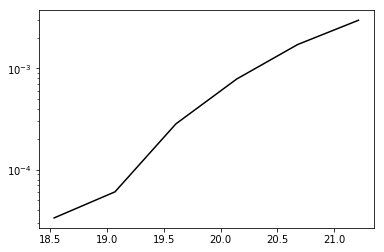

In [31]:
#Luminosity function using apparent magnitude at z=0.5
mi = min(m_app)
ma = 21.5
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(m_app, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
plt.yscale('log')

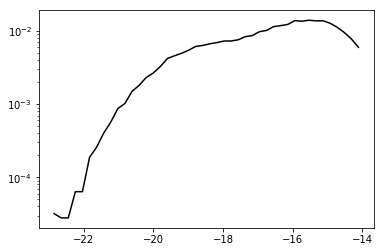

In [32]:
#Luminosity function using apparent magnitude at z=0.5
mi = min(m_abs)
ma = -14
binwidth = 0.2
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(m_abs, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
plt.yscale('log')

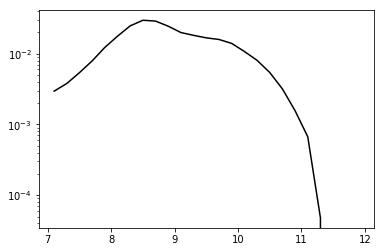

In [33]:
mi = 7
ma = 12
binwidth = 0.2
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

counts, binedges = np.histogram(np.log10(mass), range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
plt.yscale('log')